In [1]:
from astropy import units as u
import numpy as np
%matplotlib inline
import pylab as pl
from astropy.visualization import simple_norm
pl.style.use('dark_background')
pl.rcParams['figure.figsize'] = (12,12)
pl.rcParams['font.size'] = 16

# Interferometry

For source material, and a really excellent textbook and lecture notes, see
https://ratt-ru.github.io/fundamentals_of_interferometry/

A good youtube intro is available from Aaron Parsons:

* https://www.youtube.com/watch?v=JaaPH_6Dj4A
* https://www.youtube.com/watch?v=39g0hTTn5n8
* https://www.youtube.com/watch?v=bAK0GugbjKI

Interferometry is the combination of light from different telescopes coherently.

Interferometry allows us to build multi-telescope systems that have higher resolution, and often greater collecting area, than individual telescopes.

*Coherent* combination means the light has to be *in phase*: we have to have the whole plane wave of light arrive at the same time.  The timing matters!

*Incoherent* combination, by contrast, means we just add up how much light arrives - this is what we do with CCDs; photons arrive, fall into our "light buckets", and we count them up later.

The most important property of an interferometer (usually) is its resolution.

Like a normal "single-dish" (or single-aperture) telescope, the resolution is related to the *wavelength* and the *effective aperture size*.   Single-aperture telescopes have their resolution set by the interfering properties of light too.




For a single-aperture telescope, the resolution is:
$$R = \frac{\lambda}{D}$$
where $D$ is the diameter.

<img src="images/joardar_singledishaperture.png">
          
(C) Shubhendu Joardar

For an interferometer, the *separation between individual apertures*, also known as the "baseline length" $B$ is used in place of the diameter, i.e.:
$$ R = \frac{\lambda}{B} $$

<center><img src="images/joardar_twoaperture_part1.png" style="max-height:80%">
(C) Shubhendu Joardar</center>

The baseline usually means the separation between two antennae or two optical telescopes:

<img src="images/joardar_interferometer.png" style="max-height:70%">
(C) Shubhendu Joardar

What do you need to build an interferometer?

The light waves need to arrive at the detector at the same time.

But from this diagram, you can see they don't!  We have to account for the *delay* somehow
<center>
<img src="images/joardar_interferometer.png" style="max-height:40%; max-width:80%;"></center>

There are two approaches to account for the delay:

* Optical: "Delay Lines" bounce the light that is received first back and forth enough to match the path length of th e other ray
* Radio: Record the full complex signal, i.e., record the *phase* and *amplitude* of the light wave, then play it back later on a computer

(other approaches exist but are not commonly used today)

<img src="images/delayline_dullemond.png">

The delay needs to be corrected to within 1 wavelength, and the goal is generally to have a delay much less than one wavelength.

This means it's much easier to do interferometry at long wavelengths - at 1m wavelength, you only need to have the telescope position accurate to ~a few centimeter accuracy.

At optical and infrared wavelengths, you need to control the positioning of all telescope elements to ~10s of nm!  Worse, the atmosphere can screw up the incoming plane wave of light (the atmospheric turbulence that causes seeing does this), which can blur out the signal and effectively prevent interference.

Coherence demonstrated with plane waves.  $L_c$ is the "coherence length", which is proportional to the time that a wave remains coherent.  $A_c$ is the "coherence area".  The atmosphere screws up both of these.

<img style="max-width:33%; float: left" src="images/Spatial_coherence_infinite_ex1.png"> 
<img style="max-width:33%; float: left" src="images/Spatial_coherence_infinite_ex2.png">
<img style="max-width:33%; float: left" src="images/Spatial_coherence_finite.png">

<div style="float:left; max-width:100%">
Left: Perfect plane wave.
Middle: Screwy, but static, lense.
Right: Time-varying lense (like turbulent atmosphere)
    </div>

Coherence is also monochromatic: if you change the wavelength by more than a small amount, the waves no longer peak at the same place, and you again get incoherence.  The coherence length can be approximated as:
$$L = \frac{\lambda^2}{n \Delta \lambda}$$
where $\Delta \lambda$ is the bandwidth, $n$ is the refractive index, and $\lambda$ is the wavelength.

You get _longer coherence lengths_ for *smaller bandwidth*, i.e., more monochromatic.

<center><img src="images/White-Light-Coherence.png"></center>

Radio Interferometry is (usually) done by recording (digitizing) the signals at the individual telescopes, then playing them back in a specialized computed called a *correlator*.



The correlator multiplies together different time streams of data corrected by the appropriate delay to each telescope to create *interferometric visibilities*.  

The *visibility* is the key measurement of an interferometer (it is the "raw data"), and the *spatial fourier transform* of the visibilities gives you an image of the sky.

Incoherence affects radio and optical observations in the same way, but in radio astronomy we can correct for the distortions by observing *calibrators* and effectively "flattening" the incoherent waves into coherent ones.  

This after-the-fact delay correction can only be done with heterodyne measurements, since they measure *both* the phase and amplitude of the incoming wave.

Each pair of antennas produces one *visibility* measurement.

If you have two antennas, you get one visibility.

If you have three antennae, there are three pairs, so you get 3 visibilities.

If you have four antennae, there are $3+2+1 = n ( n - 1 ) /2 = 6$ visibilities.

And so on...

Interferometers let you build telescopes bigger than otherwise possible in two ways:

 * Resolution: The length of your longest baseline is dependent only on the coherence length. 
 * Collecting area: You can just keep adding on more interferometers

Example: ALMA has 50(ish) 12m dishes.  It therefore has:

In [2]:
n_ant = 50
print(f"ALMA has {n_ant} antennae and {n_ant*(n_ant-1)/2} baselines")

ALMA has 50 antennae and 1225.0 baselines


In [3]:
ant_diam = 12*u.m
print(f"ALMA has a total collecting area {n_ant * (ant_diam/2)**2 * np.pi})")

ALMA has a total collecting area 5654.8667764616275 m2)


Combining the telescopes together to form one effectively bigger telescope is called *aperture synthesis*.

If we have just the layout of the antennae as they are on the ground, we get a single "snapshot" image of the Fourier transform of the sky.

However, if we track a target as it moves over the sky, the relative shape of the interferometer changes - the baseline lengths are *projected* baseline length.

# What is a visibility?

Visibilities are the fundamental quantities measured by interferometers.  They are, by the van Cittert-Zernicke theorem, the Fourier transform of the sky brightness.

We directly measure *correlations*, which are closely related to *visibilities*.


Two antennas provide signal as a voltage, $V_i(t) = A_i e^{i \omega t} = \cos \omega t + i \sin \omega t$.

We focus first on the $\cos$ portion for simplicity; the $\sin$ part will follow by symmetry.

If the signal comes from the same source, the signals can be related by a phase delay $\tau$.

$$V_1(t) = A_1 \cos \omega t$$
$$V_2(t) = A_2 \cos \omega (t-\tau)$$

The *correlation* is defined to be $$C = \left<V_1 V_2\right>_t$$ where the $\left<\cdot\right>_t$ operation is *time averaging*

$$V_1(t) = A_1 \cos \omega t$$
$$V_2(t) = A_2 \cos \omega (t-\tau)$$
 $$C = \left<V_1 V_2\right>_t$$

Substituting gives:

$$ C = \left< A_1 A_2 \left(\cos \omega t\right)\left(\cos \omega (t-\tau)\right)  \right>_t$$


$$ C = \left< A_1 A_2 \left(\cos \omega t\right)\left(\cos \omega (t-\tau)\right)  \right>_t$$

Using a trig identity $\cos(x-y) \cos (x) = \frac{1}{2} \cos y + \frac{1}{2}\cos(2x - y)$, we get:


$$  = \left< \frac{A_1 A_2}{2} \left(\cos \omega \tau + \cos (\omega [2 t - \tau])\right) \right>_t$$

The first term has no time dependence, while the second term is a cosine that oscillates around zero.  For any period $T>>1/\omega$, it averages to zero, and we always average over much more than a full period.

Therefore, 
$$C = \frac{1}{2} A_1 A_2 \cos \omega \tau$$

We simplify $V = A_1 = A_2$.

$$ C = \frac{V^2}{2} \cos \omega \tau $$

$$ C = \frac{V^2}{2} \cos \omega \tau $$

$\tau$ is the time delay between the two signals, so $\tau = \frac{\Delta L}{c}$.

Since $\lambda = \frac{c}{\nu} = \frac{2 \pi c}{\omega}$ ($\omega = \nu/2 \pi$ is the angular frequency), we can express:

$$ C = \frac{V^2}{2} \cos \left(2 \pi \frac{\Delta L}{\lambda}\right)$$

The $\sin$ form of the correlation can be determined the same way, by symmetry, so the resulting complex correlation is:

$$ C = \frac{V}{2} \exp{- 2 \pi i \frac{\Delta L}{\lambda}} $$

where the minus sign $-$ is adopted by convention.

The ratio $\Delta L / \lambda$ is the *baseline length* in units of wavelength.

The *correlation* depends only on the amplitude of the source brightness ($V^2$), the projected baseline length $\Delta L$, and the wavelength $\lambda$.

The projected baseline length can be determined from the dot product between the baseline vector $\vec{b}$ and the source direction vector $\vec{s}$, so
$$\Delta L = \vec{s} \cdot \vec{b}$$


<center>
<img src="images/joardar_interferometer_vectors.png" style="max-height:35%; max-width:70%;"></center>

We are generally interested in looking at multiple objects.  We therefore often redefine the "source direction" as some default direction, called the *phase center* $\vec{s_0}$, plus some offset:

$$ \vec{s} = \vec{s_0} + \vec{\sigma}$$

From:
$$ C = \frac{V^2}{2} \exp \left(2 \pi i \frac{\vec{s}\cdot\vec{b}}{\lambda}\right)$$

We substitute to get the correlation as:
$$ C = \frac{V^2}{2} \exp\left[- 2 \pi i \frac{(\vec{s_0} + \vec{\sigma})\cdot \vec{b}}{\lambda}\right] $$

The correlation is, in reality, the sum of all correlated signals on a patch of sky.  If you look at anything on the sky, there isn't just one source of light, there are many.  So for some sky intensity distribution $I(\vec{s})$, the total correlation is:

$$ \underline{C} = \frac{V}{2} \int_{\Omega} I(\vec{\sigma}) e^{-2 \pi i (\vec{s}_0 + \vec{\sigma})\cdot \vec{b} / \lambda} d \Omega $$

But we can take $\vec{s}_0$, the phase center, out:

$$ \underline{C} = \frac{V}{2}e^{-2 \pi i \vec{s}_0 \cdot \vec{b} / \lambda} \int_{\Omega} I(\vec{\sigma}) e^{-2 \pi i \vec{\sigma}\cdot \vec{b} / \lambda} d \Omega $$

Since we look through a telescope, we have to multiply the sky brightness by the antenna response function:
$$ \underline{C} = \frac{V}{2}e^{-2 \pi i \vec{s}_0 \cdot \vec{b} / \lambda} \int_{\Omega} A(\vec{\sigma}) I(\vec{\sigma}) e^{-2 \pi i \vec{\sigma}\cdot \vec{b} / \lambda} d \Omega $$


The *complex visibility* is defined as just the right component of the above:

$$ \underline{V} = \int_{\Omega} A(\vec{\sigma}) I(\vec{\sigma}) e^{-2 \pi i \vec{\sigma}\cdot \vec{b} / \lambda} d \Omega $$

It is also defined as a waveform:

$$ \underline{V} = |V| e^{i\phi_V}$$

So the *visibility* and the (observed) *correlation* are related by:

$$ \underline{C} = |V| \exp \left[ i \phi_V - \frac{2 \pi i (\vec{s_0}\cdot\vec{b})}{\lambda} \right]$$

This can be read as: the correlation is the amplitude of the visibility times the correlation at some position offset from the phase center by phase $\phi_V$.

Most important to understand when dealing with interferometers is that the measured *correlation* is related to, but offset by some phase from, the on-sky *visibility*.  

Much of the "data reduction" process in radio astronomy is about properly calibrating such that your visibilities have the correct phase.

You will generally not use these equations at all in radio interferometry, but you will absolutely need to understand the term *visibility* and what its *phase* and *amplitude* are.

# Visibilities are the Fourier transform of the sky brightness

So... what does that mean exactly?

We'll demonstrate visually

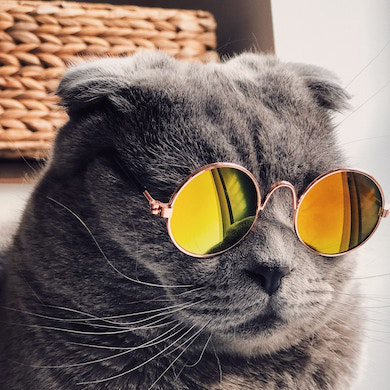

In [4]:
from PIL import Image
import requests
from io import BytesIO

url = "https://public.nrao.edu/wp-content/themes/nrao/img/cat.jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

That is our "sky brightness" - we are looking at the Cool Cat Nebula.

We want it greyscale - we're using a monochromatic interferometer.

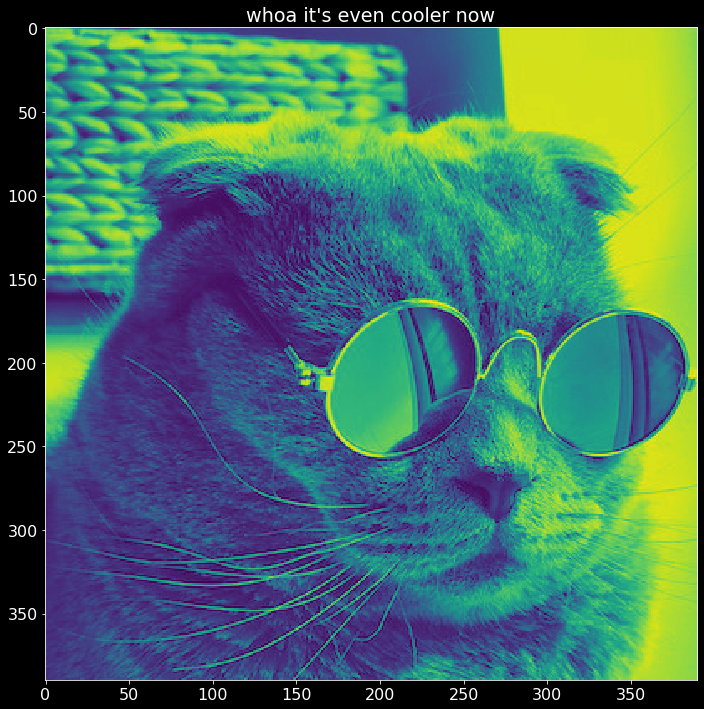

In [5]:
gimg = np.array(img).sum(axis=2)
pl.imshow(gimg); _=pl.title("whoa it's even cooler now")

What is its Fourier transform?

<img src="https://imgs.xkcd.com/comics/fourier.jpg">

In [6]:
ftim = np.fft.fftshift(np.fft.fft2(gimg))

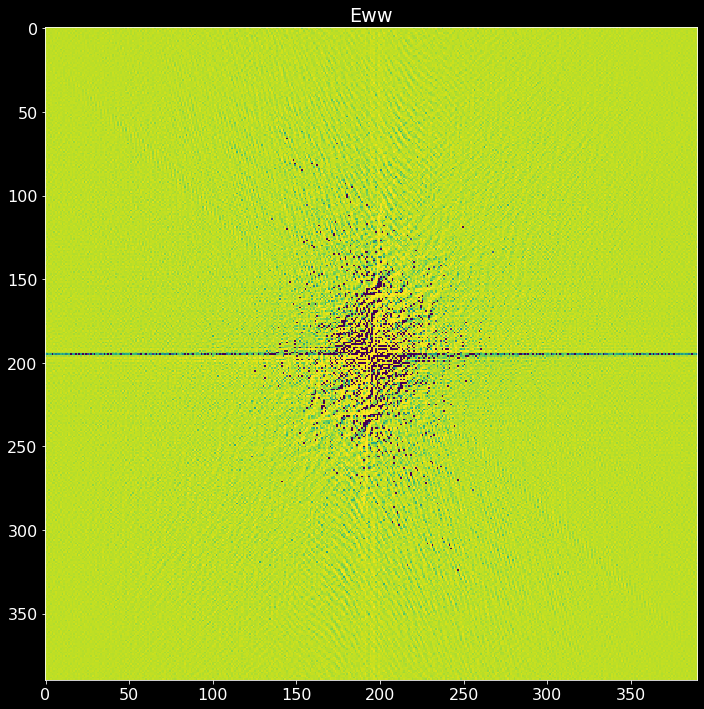

In [7]:
_=pl.imshow(ftim.real, norm=simple_norm(ftim.real, stretch='log', max_percent=99, min_percent=1))
_=pl.title("Eww")

The Fourier Transform doesn't look like much in itself, but it's a lot more interesting if you plot its *radial profile*

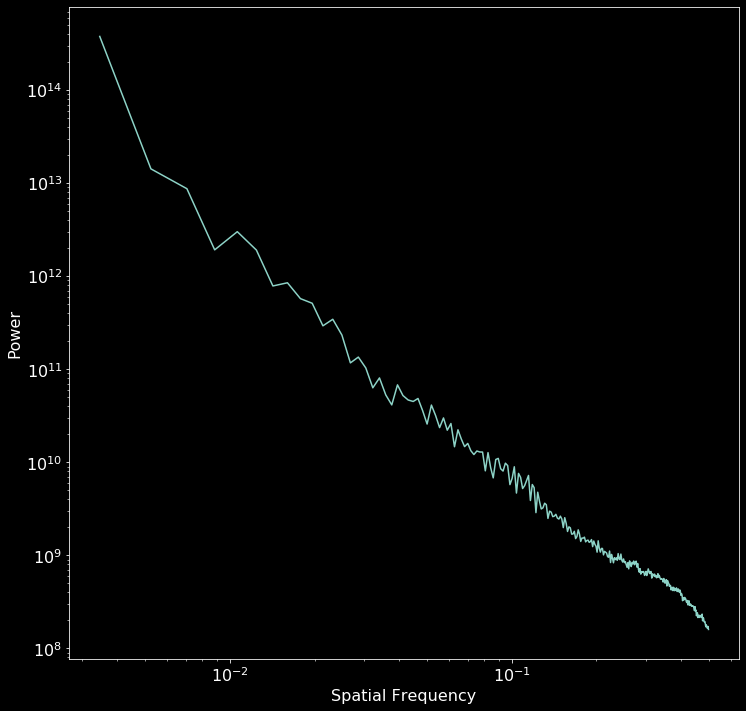

In [8]:
from turbustat.statistics import psds
frq, pspec = psds.pspec(np.abs(ftim**2).real, return_freqs=True, logspacing=False)
pl.loglog(frq, pspec)
_=pl.xlabel("Spatial Frequency")
_=pl.ylabel("Power")

An interferometer samples the U-V domain - the Fourier Transform of the sky - at a single point.  A perfect interferometer gives us a visibility.

We can examine a single *visibility* from this image.

In [9]:
visibility_point = ftim[25,95]
visibility_point

(-109.57190044673234+7680.332136368583j)

That visibility is a *complex number*, but we usually talk about its *amplitude* and *phase*:

In [10]:
amplitude = np.abs(visibility_point)
phase = np.angle(visibility_point)
print(f"{amplitude}, {phase}, {phase*180/np.pi}")

7681.113703513541, 1.5850619165526996, 90.81735808538716


What kind of baseline are we sampling?  Is it "long" or "short"?

The baseline length is effectively the distance from the center of the fourier transform

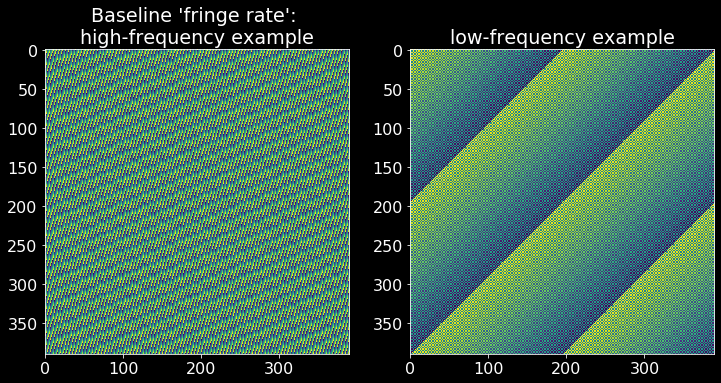

In [11]:
ft_sample = np.zeros_like(ftim)
ft_sample[25,95] = 1.+0j
pl.subplot(1,2,1).imshow(np.angle(np.fft.ifft2(ft_sample)))
_=pl.title("Baseline 'fringe rate': \nhigh-frequency example")
ft_sample = np.zeros_like(ftim)
ft_sample[194,194] = 1+0j
pl.subplot(1,2,2).imshow(np.angle(np.fft.ifft2(ft_sample)))
_=pl.title("low-frequency example")

What happens if we sample the image at a single point, then Fourier tranform back to the image?

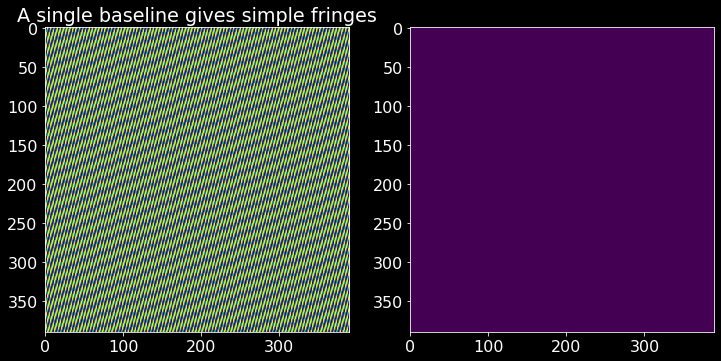

In [12]:
ft_sample = np.zeros_like(ftim)
# "randomly" selected pixel
ft_sample[25,95] = ftim[25,95]
pl.subplot(1,2,1).imshow(np.real(np.fft.ifft2(ft_sample)))
_=pl.title("A single baseline gives simple fringes")
_=pl.subplot(1,2,2).imshow(np.angle(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

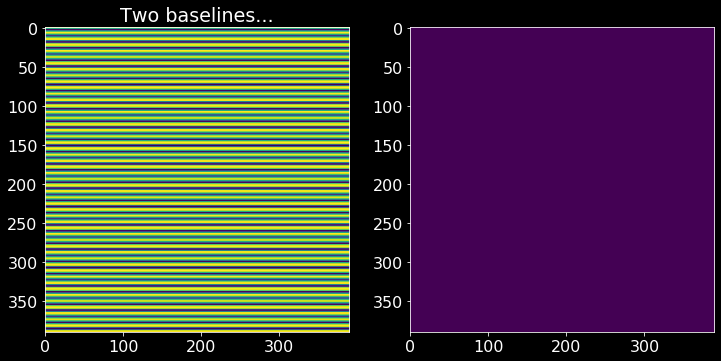

In [13]:
# "randomly" selected pixel
ft_sample[75,95] = ftim[75,95]
pl.subplot(1,2,1).imshow(np.abs(np.fft.ifft2(ft_sample)))
_=pl.title("Two baselines...")
_=pl.subplot(1,2,2).imshow(np.abs(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

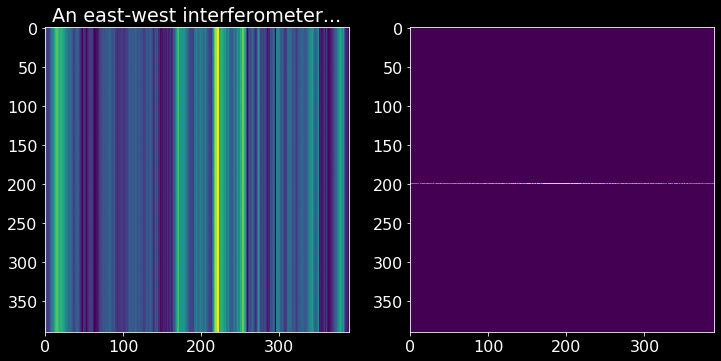

In [14]:
# a vertical stripe
ft_sample[200,:] = ftim[200,:]
pl.subplot(1,2,1).imshow(np.abs(np.fft.ifft2(ft_sample)))
_=pl.title("An east-west interferometer...")
_=pl.subplot(1,2,2).imshow(np.abs(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

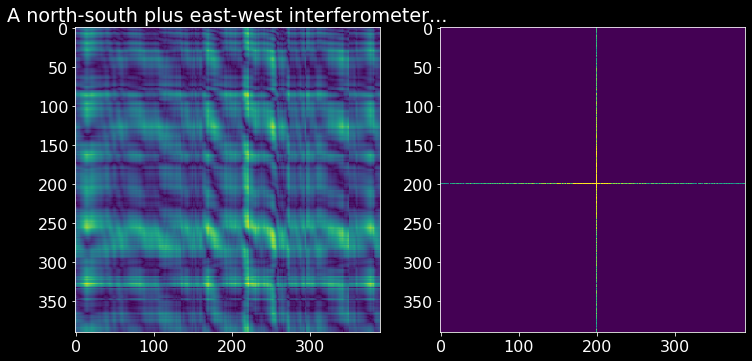

In [15]:
# a horizontal stripe
ft_sample[:,200] = ftim[:,200]
pl.subplot(1,2,1).imshow(np.abs(np.fft.ifft2(ft_sample)))
_=pl.title("A north-south plus east-west interferometer...")
_=pl.subplot(1,2,2).imshow(np.abs(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

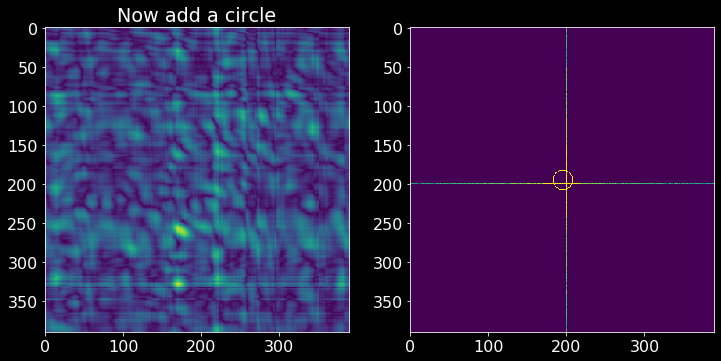

In [16]:
yy,xx = np.indices(ftim.shape)
rr = ((xx-ftim.shape[1]/2)**2 + (yy-ftim.shape[0]/2)**2)**0.5
rrint = rr.astype('int')
ft_sample[rrint==12] = ftim[rrint==12]

pl.subplot(1,2,1).imshow(np.abs(np.fft.ifft2(ft_sample)))
_=pl.title("Now add a circle")
_=pl.subplot(1,2,2).imshow(np.abs(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

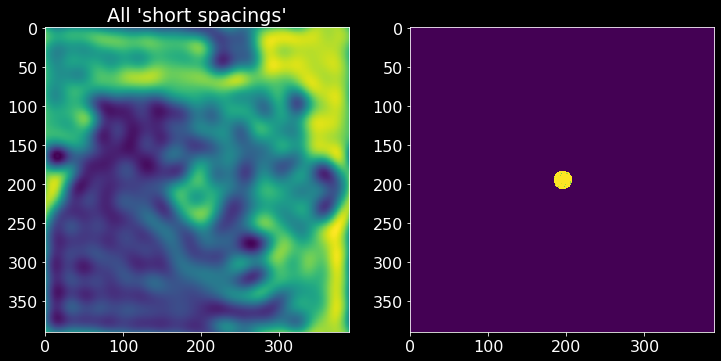

In [17]:
ft_sample = np.zeros_like(ftim)

ft_sample[rrint < 12] = ftim[rrint < 12]

pl.subplot(1,2,1).imshow(np.abs(np.fft.ifft2(ft_sample)))
_=pl.title("All 'short spacings'")
_=pl.subplot(1,2,2).imshow(np.abs(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

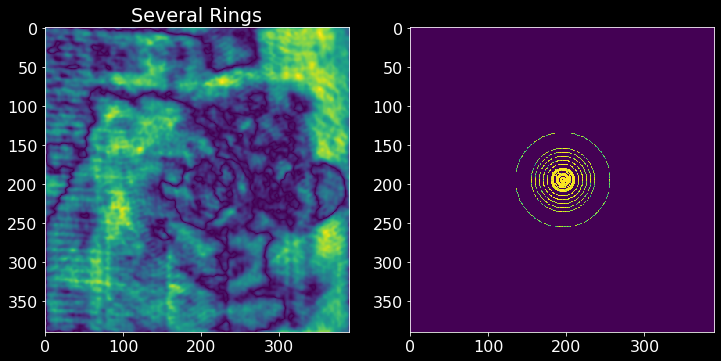

In [18]:
ft_sample = np.zeros_like(ftim)

for ii in (1,2,3,5,6,7,8,10,12,13,14,15,20,25,30,35,40,60):
    ft_sample[rrint == ii] = ftim[rrint == ii]

pl.subplot(1,2,1).imshow(np.abs(np.fft.ifft2(ft_sample)))
_=pl.title("Several Rings")
_=pl.subplot(1,2,2).imshow(np.abs(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

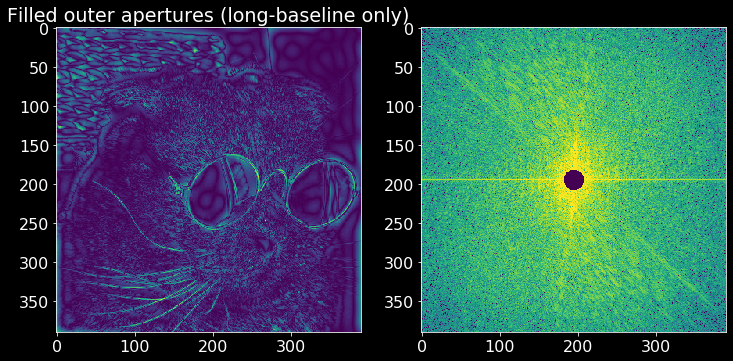

In [19]:
ft_sample = np.zeros_like(ftim)

ft_sample[rrint > 12] = ftim[rrint > 12]

pl.subplot(1,2,1).imshow(np.abs(np.fft.ifft2(ft_sample)))
_=pl.title("Filled outer apertures (long-baseline only)")
_=pl.subplot(1,2,2).imshow(np.abs(ft_sample), norm=simple_norm(np.abs(ftim), stretch='log', max_percent=99, min_percent=1))

You can play with more realistic interferometers, with some time sampling added, here:

https://public.nrao.edu/interferometry-explained/